# Redes Neurais Artificiais
 **Nome: Jo√£o Pedro Miranda Marques**
 
 **Matr√≠cula: 2017050495** 

## Exercicio 2.1 - Problema N√£o Linearmente separ√°vel

Pede-se uma proje√ß√£o n√£o linear arbitr√°ria que torne o problema linearmente separ√°vel.

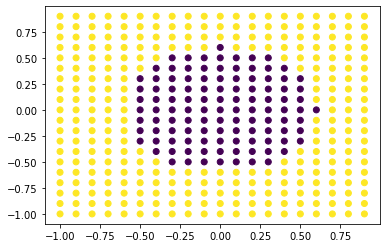

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)

grid = np.meshgrid(x, y)

def func_circle(x, y):
    return np.sqrt(x**2 + y**2)

raio = 0.6

classe = 1*(func_circle(grid[0], grid[1]) > raio)

plt.scatter(grid[0], grid[1], c = classe) 
plt.show()

Na tentativa de implementar um separador linear, temos o seguinte resultado: 

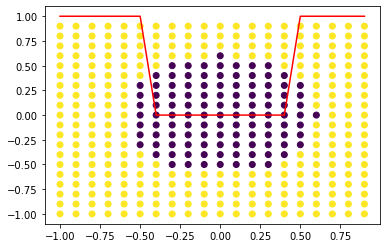

In [2]:
H = pd.DataFrame({'x2': x**2, 'y2': y**2, '1': 1})
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), classe) # w<-pseudoinverse(H) %*% Y

xgrid = x
ygrid = y
outputgrid = 1*(func_circle(xgrid, ygrid) > raio)

Hgrid = pd.DataFrame({'x': x, 'y': y, '1': 1})

yhatgrid = np.dot(Hgrid, w)

plt.scatter(grid[0], grid[1], c = classe) 
plt.plot(xgrid, outputgrid, 'r') # fun√ß√£o aproximada
plt.show()


## Exercicio 2.2 - Overfitting e Underfitting

Considerando-se a Figura 2, que apresenta os dados de treinamento para um prob- lema de regress√£o:

<img src="pic1.png" alt="drawing" width="300"/>

Dentre os 3 modelos constru√≠dos, o que melhor representa a fun√ß√£o geradora √© o representado no gr√°fico de cor azul. Isso porque o ru√≠do atribu√≠do ao sinal de entrada permite um descolamento aleat√≥rio da fun√ß√£o geradora, esse ru√≠do √© filtrado pela fun√ß√£o de aproxima√ß√£o mais pr√≥xima do ideal.

O modelo que apresenta o menor erro de treinamento est√° representado na cor preto. Este est√° coincidindo com os pontos de treinamento mostrando que o modelo pode estar absorvendo ru√≠dos sendo considerado um caso de overfitting.

O modelo que representa o melhor desempenho para dados novos √© o modelo em Azul, pois √© o mais pr√≥ximo da fun√ß√£o geradora.  Uma fun√ß√£o com overfitting nos dados de treinamento apresenta boa acertividade com rela√ß√£o a esses dados. Por√©m, quando se utiliza o modelo para dados diferentes do treinado, como o ru√≠do √© uma vari√°vel aleat√≥ria, a assertividade vai ser menor que da fun√ß√£o mais pr√≥xima a fun√ß√£o geradora.



## Exercicio 2.3 - Aproxima√ß√£o polinomial em camadas

Inicialmente iremos gerar os dados de treinamento. A partir da fun√ß√£o geradora ùëìùëî(ùë•) = 12ùë•ÀÜ2 + 3ùë• + 10.
O vetor X contem amostras da fun√ß√£o geradora amostrado de uma distribui√ß√£o Normal com m√©dia 0 e desvio padr√£o unit√°rio.

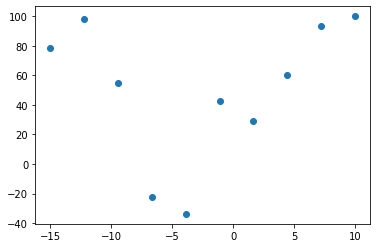

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = np.linspace(-15,10,10)

def fgx(X):
    return 0.5*X**2 + 3*X + 10

mu, sigma = 0, 4
Y = fgx(X) + 10 * np.random.normal(mu, sigma, len(X)) # Y<-fgx(X) + 10*rnorm(length(X))

#print da fun√ß√£o
plt.scatter(X,Y)
plt.show()

Cria√ß√£o da Matriz H e  obten√ß√£o dos pesos w correspondentes a solu√ß√£o final dos coeficientes do polin√¥mio aproximador.

In [4]:
# O n√∫mero de par√¢metros de um neur√¥nio tipo MCP ser√° sempre n + 1, onde n  √© o n√∫mero de vari√°veis, ou dimens√£o, do espa√ßo de entrada.
H = pd.DataFrame({'x2': X**2, 'x': X, '1': 1}) # > H<-cbind(X^2,X,1)
# print(H)

# Como y = H * w, podemos encontrar w pela multiplica√ß√£o da pseudoinversa de H e y.
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), Y) # w<-pseudoinverse(H) %*% Y
print('w: ', w)


w:  [ 0.63130336  4.05966503 16.09769841]


Podemos mensurar a qualidade dos pesos adiquiridos comparando com os pesos da equa√ß√£o geradora:  0.5 , 3 , 10

Vamos utilizar o modelo gerado para estimar novos valores da fun√ß√£o geradora.

In [5]:
# Novos valores a serem utilizados
xgrid = np.arange(-15,10,0.1)
ygrid = fgx(xgrid)
# print('xgrid: ', xgrid,'ygrid: ',  ygrid)

# Gerar uma nova Matriz Hgrid para as entradas de teste xgrid
Hgrid = pd.DataFrame({'x2': xgrid**2, 'x': xgrid, '1': 1})
# print('Hgrid: ', Hgrid)

# Verificar a sa√≠da yhatgrid gerada a partir da multiplica√ß√£o matricial de Hgrid com os valores w pesos encontrados
yhatgrid = np.dot(Hgrid, w) # > yhatgrid<-Hgrid %*% w
# print('yhatgrid: ', yhatgrid)

Plot dos valores iniciais a serem testados em pontos azuis.

Plot da fun√ß√£o geradora em linha azul.

Plot da fun√ß√£o aproximada em linha vermelha.

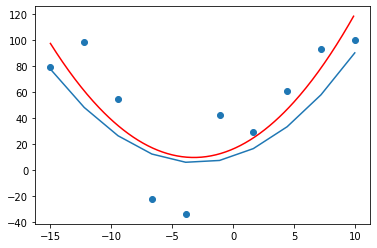

In [6]:
#print da fun√ß√£o
plt.scatter(X,Y) # dados gerados
plt.plot(xgrid, yhatgrid, 'r') # fun√ß√£o aproximada
plt.plot(X,fgx(X)) #fun√ß√£o geradora
plt.show()

Teste para 100 valores: 

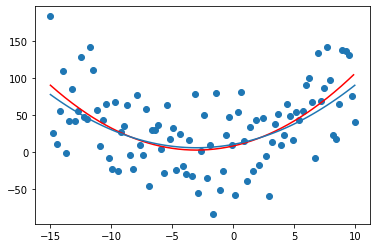

In [7]:

X = np.linspace(-15,10,100)
Y = fgx(X) + 10 * np.random.normal(mu, sigma, len(X)) # Y<-fgx(X) + 10*rnorm(length(X))
H = pd.DataFrame({'x2': X**2, 'x': X, '1': 1}) # > H<-cbind(X^2,X,1)
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), Y) # w<-pseudoinverse(H) %*% Y

xgrid = np.arange(-15,10,0.1)
ygrid = fgx(xgrid)

Hgrid = pd.DataFrame({'x2': xgrid**2, 'x': xgrid, '1': 1})

yhatgrid = np.dot(Hgrid, w) # > yhatgrid<-Hgrid %*% w

plt.scatter(X,Y) # dados gerados
plt.plot(xgrid, yhatgrid, 'r') # fun√ß√£o aproximada
plt.plot(X,fgx(X)) #fun√ß√£o geradora
plt.show()

Podemos ver que utilizando 100 valores de treinamento conseguimos aproximar da fun√ß√£o geradora.
